## 1. Import Necessary libraries

In [70]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

import xgboost as xgb
import lightgbm as lgb

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from matplotlib import pyplot as plt

## 2. Import data

In [3]:
credit_data = pd.read_csv('credit_card_clean.csv')
credit_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,highschool,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,male,highschool,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,male,university,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,male,highschool,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


## 3. Data Understanding

### Exploring the variable
* ID : ID of each client

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

* SEX: Gender (1=male, 2=female)

* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

* MARRIAGE: Marital status (1=married, 2=single, 3=others)

* AGE: Age in years

* PAY_1: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* PAY_2: Repayment status in August, 2005 (scale same as above)

* PAY_3: Repayment status in July, 2005 (scale same as above)

* PAY_4: Repayment status in June, 2005 (scale same as above)

* PAY_5: Repayment status in May, 2005 (scale same as above)

* PAY_6: Repayment status in April, 2005 (scale same as above)

* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

#### Target variable
default.payment.next.month: Default payment (1=yes, 0=no)

###### Note: NT is Taiwain Dollars

In [4]:
credit_data.shape

(30000, 25)

In [5]:
credit_data.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [6]:
credit_data.dtypes

ID             int64
LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

## Step 4 -  Data Preprocessing

In [7]:
del credit_data['ID']

In [16]:
le = LabelEncoder()
credit_data['SEX'] = le.fit_transform(credit_data['SEX'])
credit_data['EDUCATION'] = le.fit_transform(credit_data['EDUCATION'])
credit_data['MARRIAGE']  = le.fit_transform(credit_data['MARRIAGE'])
credit_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,0,3,0,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,0,3,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,3,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,3,0,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,3,0,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,1,0,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,1,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,3,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,1,0,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [17]:
credit_data.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int32
MARRIAGE       int32
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

## Step 5 - Model Building

In [21]:
X = credit_data.drop('DEFAULT',axis = 1)
y = credit_data[['DEFAULT']]

In [22]:
X.shape,y.shape

((30000, 23), (30000, 1))

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12,stratify=y,shuffle=True)

In [24]:
X_train.shape,y_train.shape

((24000, 23), (24000, 1))

In [25]:
X_test.shape,y_test.shape

((6000, 23), (6000, 1))

## Step 6 - Model Training

In [26]:
rf_classifier  = RandomForestClassifier()
adb_classifier = AdaBoostClassifier()
gb_classifier  = GradientBoostingClassifier()
xgb_classifier = XGBClassifier()
lgb_classifier = LGBMClassifier()

#### Training Time Analysis

In [28]:
%%time
rf_classifier.fit(X_train,y_train)

Wall time: 7.06 s


RandomForestClassifier()

In [29]:
%%time
adb_classifier.fit(X_train,y_train)

Wall time: 2.28 s


AdaBoostClassifier()

In [30]:
%%time
gb_classifier.fit(X_train,y_train)

Wall time: 10.5 s


GradientBoostingClassifier()

In [31]:
%%time
xgb_classifier.fit(X_train,y_train)

[12:34:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 4.28 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
%%time
lgb_classifier.fit(X_train,y_train)

Wall time: 494 ms


LGBMClassifier()

## Step 7 - Model Testing

In [33]:
y_pred_rf  = rf_classifier.predict(X_test)
y_pred_ab  = adb_classifier.predict(X_test)
y_pred_gb  = gb_classifier.predict(X_test)
y_pred_xgb = xgb_classifier.predict(X_test)
y_pred_lgb = lgb_classifier.predict(X_test)

## Step 8 - Model Evaluation

#### Random Forest Performance

In [43]:
print('Accuracy Score  : ', round(accuracy_score(y_test,y_pred_rf),4))
print('Precision Score : ', round(precision_score(y_test,y_pred_rf),4))
print('Recall Score    : ', round(recall_score(y_test,y_pred_rf),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_rf))

Accuracy Score  :  0.8192
Precision Score :  0.6613
Recall Score    :  0.3738
Confusion Matrix:
 [[4419  254]
 [ 831  496]]


#### AdaBoost Performace

In [44]:
print('Accuracy Score  : ', round(accuracy_score(y_test,y_pred_ab),4))
print('Precision Score : ', round(precision_score(y_test,y_pred_ab),4))
print('Recall Score    : ', round(recall_score(y_test,y_pred_ab),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_ab))

Accuracy Score  :  0.8192
Precision Score :  0.6927
Recall Score    :  0.3278
Confusion Matrix:
 [[4480  193]
 [ 892  435]]


#### GB Performace

In [45]:
print('Accuracy Score  : ', round(accuracy_score(y_test,y_pred_gb),4))
print('Precision Score : ', round(precision_score(y_test,y_pred_gb),4))
print('Recall Score    : ', round(recall_score(y_test,y_pred_gb),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_gb))

Accuracy Score  :  0.8248
Precision Score :  0.696
Recall Score    :  0.3693
Confusion Matrix:
 [[4459  214]
 [ 837  490]]


#### XGBM Performance

In [46]:
print('Accuracy Score  : ', round(accuracy_score(y_test,y_pred_xgb),4))
print('Precision Score : ', round(precision_score(y_test,y_pred_xgb),4))
print('Recall Score    : ', round(recall_score(y_test,y_pred_xgb),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_xgb))

Accuracy Score  :  0.8153
Precision Score :  0.645
Recall Score    :  0.367
Confusion Matrix:
 [[4405  268]
 [ 840  487]]


#### LGBM Performance

In [47]:
print('Accuracy Score  : ', round(accuracy_score(y_test,y_pred_lgb),4))
print('Precision Score : ', round(precision_score(y_test,y_pred_lgb),4))
print('Recall Score    : ', round(recall_score(y_test,y_pred_lgb),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_lgb))

Accuracy Score  :  0.822
Precision Score :  0.6863
Recall Score    :  0.3595
Confusion Matrix:
 [[4455  218]
 [ 850  477]]


### =========================================================================================

# FEATURE IMPORTANCES

In [53]:
rf_features  = rf_classifier.feature_importances_
gb_features  = gb_classifier.feature_importances_
adb_features = adb_classifier.feature_importances_
xgb_features = xgb_classifier.feature_importances_
lgb_features = lgb_classifier.feature_importances_

In [55]:
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [63]:
feature_importance = pd.DataFrame({'Features'         : X_train.columns,
                                   'RF Features'      : rf_features,
                                   'AdaBoost Features':adb_features,
                                   'GB Features'      : gb_features,
                                   'XGB Features'     : xgb_features,
                                   'LGBM Features'    :lgb_features})
feature_importance

,Features,RF Features,AdaBoost Features,GB Features,XGB Features,LGBM Features
0,LIMIT_BAL,0.060271,0.08,0.032703,0.024132,215
1,SEX,0.012253,0.02,0.002271,0.017697,35
2,EDUCATION,0.018530,0.00,0.002574,0.020403,64
3,MARRIAGE,0.013175,0.02,0.004880,0.020488,36
4,AGE,0.066529,0.00,0.006101,0.017460,201
5,PAY_1,0.099504,0.18,0.629924,0.356028,103
6,PAY_2,0.039333,0.06,0.083481,0.117766,44
7,PAY_3,0.033334,0.02,0.032262,0.049169,50
8,PAY_4,0.022171,0.02,0.017808,0.041508,37
9,PAY_5,0.018544,0.04,0.015974,0.042685,37


### 1. Pick up the important features of RF

In [66]:
rf_imp_features = feature_importance.sort_values(by = 'RF Features',ascending=False)
rf_imp_features

,Features,RF Features,AdaBoost Features,GB Features,XGB Features,LGBM Features
5,PAY_1,0.099504,0.18,0.629924,0.356028,103
4,AGE,0.066529,0.00,0.006101,0.017460,201
0,LIMIT_BAL,0.060271,0.08,0.032703,0.024132,215
11,BILL_AMT1,0.059474,0.12,0.035113,0.024950,264
12,BILL_AMT2,0.054435,0.02,0.009337,0.020618,132
17,PAY_AMT1,0.053013,0.02,0.016008,0.020551,191
13,BILL_AMT3,0.051602,0.06,0.008617,0.021075,147
16,BILL_AMT6,0.051529,0.00,0.006038,0.019284,171
14,BILL_AMT4,0.050660,0.06,0.006136,0.021458,154
15,BILL_AMT5,0.050282,0.04,0.007004,0.019262,132


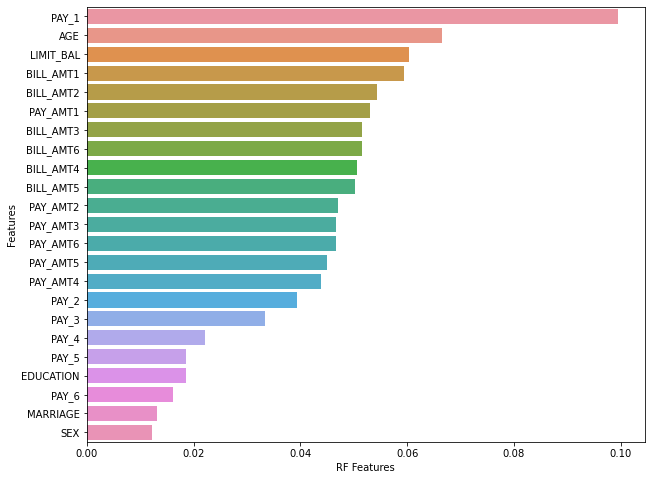

In [72]:
plt.figure(figsize=(10,8))
sns.barplot(x='RF Features', y='Features',data=rf_imp_features)
plt.show()

### 2. Get the important features of AdaBoost

In [73]:
adb_imp_features = feature_importance.sort_values(by = 'AdaBoost Features',ascending=False)
adb_imp_features

,Features,RF Features,AdaBoost Features,GB Features,XGB Features,LGBM Features
5,PAY_1,0.099504,0.18,0.629924,0.356028,103
11,BILL_AMT1,0.059474,0.12,0.035113,0.024950,264
19,PAY_AMT3,0.046702,0.08,0.024370,0.024963,192
0,LIMIT_BAL,0.060271,0.08,0.032703,0.024132,215
13,BILL_AMT3,0.051602,0.06,0.008617,0.021075,147
14,BILL_AMT4,0.050660,0.06,0.006136,0.021458,154
6,PAY_2,0.039333,0.06,0.083481,0.117766,44
18,PAY_AMT2,0.047111,0.06,0.019108,0.022695,181
20,PAY_AMT4,0.043814,0.04,0.007043,0.020059,164
9,PAY_5,0.018544,0.04,0.015974,0.042685,37


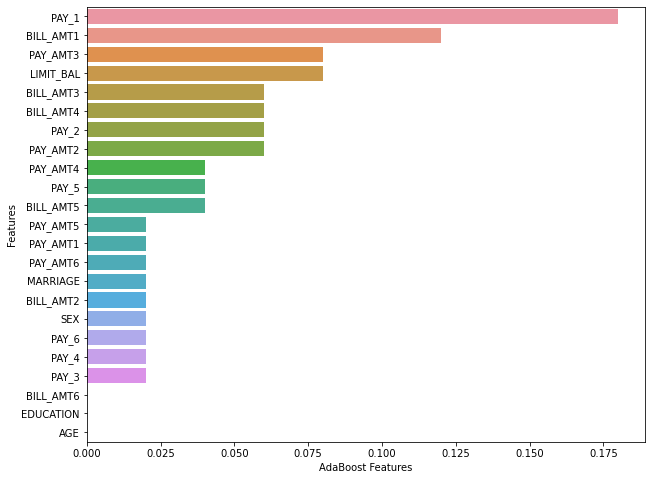

In [75]:
plt.figure(figsize=(10,8))
sns.barplot(x='AdaBoost Features', y='Features',data=adb_imp_features)
plt.show()

### Try with other Algorithm Important Features

# THE END!!